In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 128.", name="epoch 100")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=100, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 70,297
Trainable params: 70,297
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
1/5 [=====>........................] - ETA: 6s - loss: 1.3596 - mae: 1.0705

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 6s 1s/step - loss: 1.2092 - mae: 0.9989 - val_loss: 0.8017 - val_mae: 0.7826
Epoch 2/100
3/5 [=================>............] - ETA: 0s - loss: 0.6254 - mae: 0.6620

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 967ms/step - loss: 0.5643 - mae: 0.6152 - val_loss: 0.3308 - val_mae: 0.4562
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.2932 - mae: 0.4331

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 892ms/step - loss: 0.2932 - mae: 0.4331 - val_loss: 0.1818 - val_mae: 0.3492
Epoch 4/100
3/5 [=================>............] - ETA: 0s - loss: 0.1692 - mae: 0.3370

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 981ms/step - loss: 0.1737 - mae: 0.3410 - val_loss: 0.1757 - val_mae: 0.3482
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 0.1678 - mae: 0.3312

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 914ms/step - loss: 0.1678 - mae: 0.3312 - val_loss: 0.1535 - val_mae: 0.3255
Epoch 6/100
5/5 [==============================] - ETA: 0s - loss: 0.1467 - mae: 0.3139

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.1467 - mae: 0.3139 - val_loss: 0.1247 - val_mae: 0.2913
Epoch 7/100
5/5 [==============================] - ETA: 0s - loss: 0.1179 - mae: 0.2772

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 971ms/step - loss: 0.1179 - mae: 0.2772 - val_loss: 0.0909 - val_mae: 0.2448
Epoch 8/100
3/5 [=================>............] - ETA: 0s - loss: 0.0894 - mae: 0.2418

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0837 - mae: 0.2310 - val_loss: 0.0666 - val_mae: 0.2033
Epoch 9/100
5/5 [==============================] - ETA: 0s - loss: 0.0656 - mae: 0.1990

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 867ms/step - loss: 0.0656 - mae: 0.1990 - val_loss: 0.0655 - val_mae: 0.1970
Epoch 10/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0691 - mae: 0.2056 - val_loss: 0.0676 - val_mae: 0.1970
Epoch 11/100
5/5 [==============================] - 0s 53ms/step - loss: 0.0693 - mae: 0.2026 - val_loss: 0.0705 - val_mae: 0.2130
Epoch 12/100
5/5 [==============================] - ETA: 0s - loss: 0.0658 - mae: 0.1996

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 942ms/step - loss: 0.0658 - mae: 0.1996 - val_loss: 0.0597 - val_mae: 0.1889
Epoch 13/100
3/5 [=================>............] - ETA: 0s - loss: 0.0633 - mae: 0.1960

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0627 - mae: 0.1946 - val_loss: 0.0593 - val_mae: 0.1874
Epoch 14/100
5/5 [==============================] - ETA: 0s - loss: 0.0605 - mae: 0.1888

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 968ms/step - loss: 0.0605 - mae: 0.1888 - val_loss: 0.0577 - val_mae: 0.1857
Epoch 15/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0588 - mae: 0.1854 - val_loss: 0.0583 - val_mae: 0.1876
Epoch 16/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0587 - mae: 0.1867 - val_loss: 0.0603 - val_mae: 0.1867
Epoch 17/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0578 - mae: 0.1841

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 898ms/step - loss: 0.0587 - mae: 0.1858 - val_loss: 0.0575 - val_mae: 0.1827
Epoch 18/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0590 - mae: 0.1852 - val_loss: 0.0602 - val_mae: 0.1911
Epoch 19/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0580 - mae: 0.1865

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 885ms/step - loss: 0.0579 - mae: 0.1844 - val_loss: 0.0574 - val_mae: 0.1825
Epoch 20/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0575 - mae: 0.1840 - val_loss: 0.0587 - val_mae: 0.1838
Epoch 21/100
5/5 [==============================] - ETA: 0s - loss: 0.0573 - mae: 0.1824

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0573 - mae: 0.1824 - val_loss: 0.0568 - val_mae: 0.1823
Epoch 22/100
5/5 [==============================] - 0s 74ms/step - loss: 0.0573 - mae: 0.1821 - val_loss: 0.0606 - val_mae: 0.1924
Epoch 23/100
5/5 [==============================] - 0s 49ms/step - loss: 0.0588 - mae: 0.1860 - val_loss: 0.0570 - val_mae: 0.1823
Epoch 24/100
5/5 [==============================] - 0s 42ms/step - loss: 0.0573 - mae: 0.1834 - val_loss: 0.0598 - val_mae: 0.1854
Epoch 25/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0577 - mae: 0.1839 - val_loss: 0.0577 - val_mae: 0.1825
Epoch 26/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0567 - mae: 0.1812 - val_loss: 0.0577 - val_mae: 0.1845
Epoch 27/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0575 - mae: 0.1833 - val_loss: 0.0605 - val_mae: 0.1915
Epoch 28/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0580 - mae: 0.1843 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 920ms/step - loss: 0.0566 - mae: 0.1817 - val_loss: 0.0566 - val_mae: 0.1827
Epoch 38/100
3/5 [=================>............] - ETA: 0s - loss: 0.0585 - mae: 0.1845

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0568 - mae: 0.1824 - val_loss: 0.0565 - val_mae: 0.1822
Epoch 39/100
5/5 [==============================] - 0s 57ms/step - loss: 0.0564 - mae: 0.1810 - val_loss: 0.0570 - val_mae: 0.1833
Epoch 40/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0566 - mae: 0.1820 - val_loss: 0.0568 - val_mae: 0.1811
Epoch 41/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0567 - mae: 0.1827 - val_loss: 0.0585 - val_mae: 0.1834
Epoch 42/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0561 - mae: 0.1804 - val_loss: 0.0571 - val_mae: 0.1828
Epoch 43/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0565 - mae: 0.1812 - val_loss: 0.0566 - val_mae: 0.1820
Epoch 44/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0602 - mae: 0.1848

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 893ms/step - loss: 0.0558 - mae: 0.1799 - val_loss: 0.0564 - val_mae: 0.1819
Epoch 45/100
3/5 [=================>............] - ETA: 0s - loss: 0.0555 - mae: 0.1797

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0558 - mae: 0.1804 - val_loss: 0.0562 - val_mae: 0.1806
Epoch 46/100
5/5 [==============================] - 0s 74ms/step - loss: 0.0558 - mae: 0.1803 - val_loss: 0.0566 - val_mae: 0.1813
Epoch 47/100
5/5 [==============================] - 0s 53ms/step - loss: 0.0559 - mae: 0.1803 - val_loss: 0.0570 - val_mae: 0.1809
Epoch 48/100
5/5 [==============================] - 0s 39ms/step - loss: 0.0558 - mae: 0.1806 - val_loss: 0.0588 - val_mae: 0.1831
Epoch 49/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0563 - mae: 0.1808 - val_loss: 0.0568 - val_mae: 0.1819
Epoch 50/100
5/5 [==============================] - 0s 33ms/step - loss: 0.0559 - mae: 0.1805 - val_loss: 0.0573 - val_mae: 0.1820
Epoch 51/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0558 - mae: 0.1799 - val_loss: 0.0568 - val_mae: 0.1825
Epoch 52/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0560 - mae: 0.1802 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 853ms/step - loss: 0.0551 - mae: 0.1789 - val_loss: 0.0561 - val_mae: 0.1815
Epoch 64/100
5/5 [==============================] - 0s 53ms/step - loss: 0.0551 - mae: 0.1796 - val_loss: 0.0575 - val_mae: 0.1816
Epoch 65/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0551 - mae: 0.1790 - val_loss: 0.0564 - val_mae: 0.1807
Epoch 66/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0547 - mae: 0.1783 - val_loss: 0.0581 - val_mae: 0.1818
Epoch 67/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0555 - mae: 0.1800 - val_loss: 0.0576 - val_mae: 0.1811
Epoch 68/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0550 - mae: 0.1788 - val_loss: 0.0563 - val_mae: 0.1810
Epoch 69/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0548 - mae: 0.1784 - val_loss: 0.0573 - val_mae: 0.1839
Epoch 70/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0555 - mae: 0.1806 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0597 - mae: 0.1885 - val_loss: 0.0558 - val_mae: 0.1803
Epoch 80/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0567 - mae: 0.1817 - val_loss: 0.0604 - val_mae: 0.1937
Epoch 81/100
5/5 [==============================] - 0s 51ms/step - loss: 0.0575 - mae: 0.1854 - val_loss: 0.0566 - val_mae: 0.1827
Epoch 82/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0575 - mae: 0.1853 - val_loss: 0.0593 - val_mae: 0.1840
Epoch 83/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0566 - mae: 0.1826 - val_loss: 0.0570 - val_mae: 0.1815
Epoch 84/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0550 - mae: 0.1791 - val_loss: 0.0558 - val_mae: 0.1805
Epoch 85/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0561 - mae: 0.1811 - val_loss: 0.0571 - val_mae: 0.1843
Epoch 86/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0548 - mae: 0.1790 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 896ms/step - loss: 0.0547 - mae: 0.1790 - val_loss: 0.0557 - val_mae: 0.1805
Epoch 90/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0539 - mae: 0.1772 - val_loss: 0.0565 - val_mae: 0.1825
Epoch 91/100
5/5 [==============================] - 0s 50ms/step - loss: 0.0545 - mae: 0.1784 - val_loss: 0.0564 - val_mae: 0.1807
Epoch 92/100
5/5 [==============================] - 0s 44ms/step - loss: 0.0544 - mae: 0.1790 - val_loss: 0.0580 - val_mae: 0.1819
Epoch 93/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0576 - mae: 0.1821

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 917ms/step - loss: 0.0545 - mae: 0.1780 - val_loss: 0.0557 - val_mae: 0.1801
Epoch 94/100
5/5 [==============================] - ETA: 0s - loss: 0.0537 - mae: 0.1769

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 920ms/step - loss: 0.0537 - mae: 0.1769 - val_loss: 0.0553 - val_mae: 0.1790
Epoch 95/100
5/5 [==============================] - 0s 71ms/step - loss: 0.0535 - mae: 0.1770 - val_loss: 0.0555 - val_mae: 0.1787
Epoch 96/100
5/5 [==============================] - 0s 49ms/step - loss: 0.0534 - mae: 0.1762 - val_loss: 0.0557 - val_mae: 0.1799
Epoch 97/100
1/5 [=====>........................] - ETA: 0s - loss: 0.0553 - mae: 0.1810

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_153231-2ojpyfpe\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 914ms/step - loss: 0.0536 - mae: 0.1766 - val_loss: 0.0552 - val_mae: 0.1800
Epoch 98/100
5/5 [==============================] - 0s 79ms/step - loss: 0.0536 - mae: 0.1765 - val_loss: 0.0554 - val_mae: 0.1795
Epoch 99/100
5/5 [==============================] - 0s 53ms/step - loss: 0.0534 - mae: 0.1767 - val_loss: 0.0570 - val_mae: 0.1850
Epoch 100/100
5/5 [==============================] - 0s 40ms/step - loss: 0.0541 - mae: 0.1783 - val_loss: 0.0567 - val_mae: 0.1831


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 201ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.657324 , 1.6482542, 1.5743119, 1.5345173, 1.6609256, 1.8161191,
        1.636426 , 1.7284536, 1.817119 , 1.7779558, 1.8620456, 1.8318454,
        1.7644478, 1.7156202, 1.7038686, 1.6310759, 1.822514 , 1.8370649,
        1.7155486, 1.8246399, 1.8816279, 1.8774142, 1.9032723, 2.0594106,
        1.8515993]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

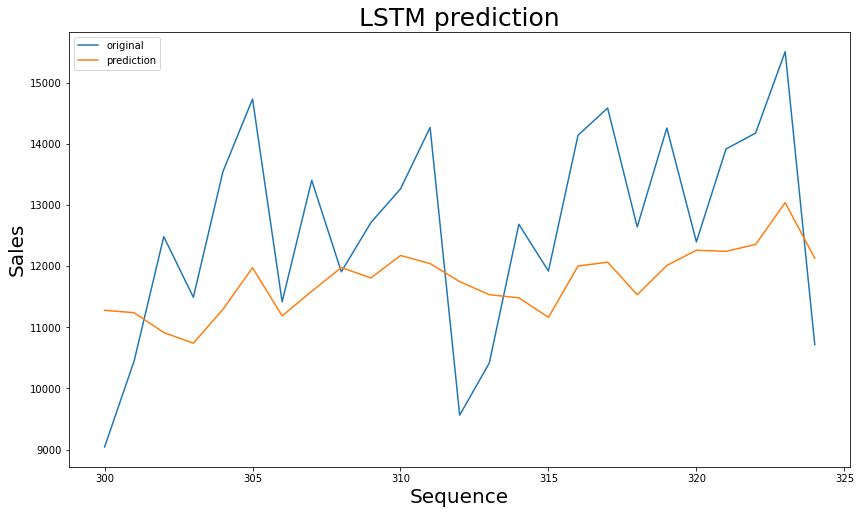

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 15ms/step - loss: 0.1483 - mae: 0.3423


[0.14829862117767334, 0.3422940969467163]